<a href="https://colab.research.google.com/github/Vignesh-S-GitHub/My-Projects/blob/main/IPL_Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### **IPL 2008 to 2023 data Analysis!**

![Image](https://v3img.voot.com/v3Storage/assets/ipl_show_page_horizontal-1703009154244.jpg)




## **We will analysis the IPL data from 2008 from 2023 and get insights try to find the answers below**

1. Who is most Toss Won Team and eventually won that match?
2. After Toss win, which team has won most match when it's choose BOWL FIRST?
3. After Toss win, which team has won most match when it's choose BAT FIRST?
4. Which venue is the teams are the most powerful to play and won the match?
5. The Team won the highest times when, which Captain is leading the game?
6. Home key Player are leads to win when they perform well?




In [4]:
#Import All the Required Librarys
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [5]:
#read the CSV and chech the data
columns = ["season","name","short_name","home_team","away_team","decision","1st_inning_score","2nd_inning_score",\
           "winner",'venue_name',"home_captain","away_captain","home_overs","home_runs","home_wickets","home_boundaries",\
           "away_overs", "away_runs", "away_wickets", "away_boundaries","home_key_batsman","home_key_bowler",\
           "home_playx1", "away_playx1", "away_key_batsman", "away_key_bowler","umpire1", "umpire2", "tv_umpire",\
           "referee",	"reserve_umpire","toss_won"]
df_ipl = pd.read_csv("/content/drive/MyDrive/Project_Data/IPL_Data/IPL_Data_2008-2023.csv", usecols=columns)
#df_ipl.head()

In [ ]:
#Check for missing values:
print(df_ipl.isnull().sum())

In [ ]:
#Check for duplicates:
print(df_ipl.duplicated().sum())

In [ ]:
#Check the Data Descritions
df_ipl.describe()

In [ ]:
# Discover the column names
df_ipl.columns

In [ ]:
# Get summary information of the dataframe
df_ipl.info()

In [ ]:
#Check the Shape of df_ipl
df_ipl.shape

##Who is most Toss Won Team and eventually won that match?

In [ ]:
df_ipl_toss_won = df_ipl.loc[:, ["toss_won","winner"]]
df_ipl_toss_won.head()


In [13]:
ipl_short_name = df_ipl['short_name'].str.split(" v ").str.get(0).unique()

In [ ]:
win_count = df_ipl['winner'].value_counts(sort=True)
toss_count = df_ipl['toss_won'].value_counts(sort=True)
win_toss_df = pd.merge(win_count,toss_count, how="inner", left_index=True,right_index=True)
print(win_toss_df)

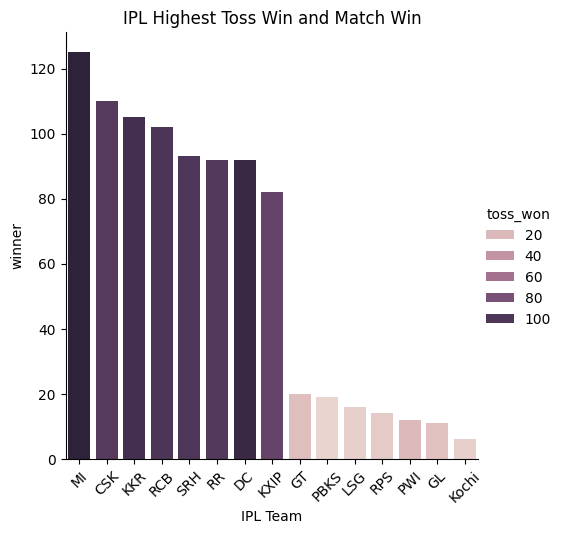

In [15]:
sns.catplot(data=win_toss_df, x=win_toss_df.index, y="winner", kind="bar", hue="toss_won", errorbar=('ci', False))
plt.xticks(rotation=45)
plt.xlabel("IPL Team")
plt.title("IPL Highest Toss Win and Match Win")
plt.savefig("/content/IPL_Data/my_seaborn_plot.png",dpi=300, bbox_inches='tight')